In [188]:
using Random, StatsBase, CairoMakie, Revise, Statistics

In [189]:
includet("../StupidDiceTricksRepo/DiceTricks.jl")
includet("../StupidDiceTricksRepo/Yahtzee.jl")

In [190]:
using .DiceTricks, .Yahtzee

In [191]:
control = rolltrials(roll_die, 10_000_000)

10000000-element Vector{Int64}:
 4
 1
 2
 5
 5
 5
 5
 4
 1
 5
 ⋮
 3
 2
 6
 1
 5
 4
 3
 1
 5

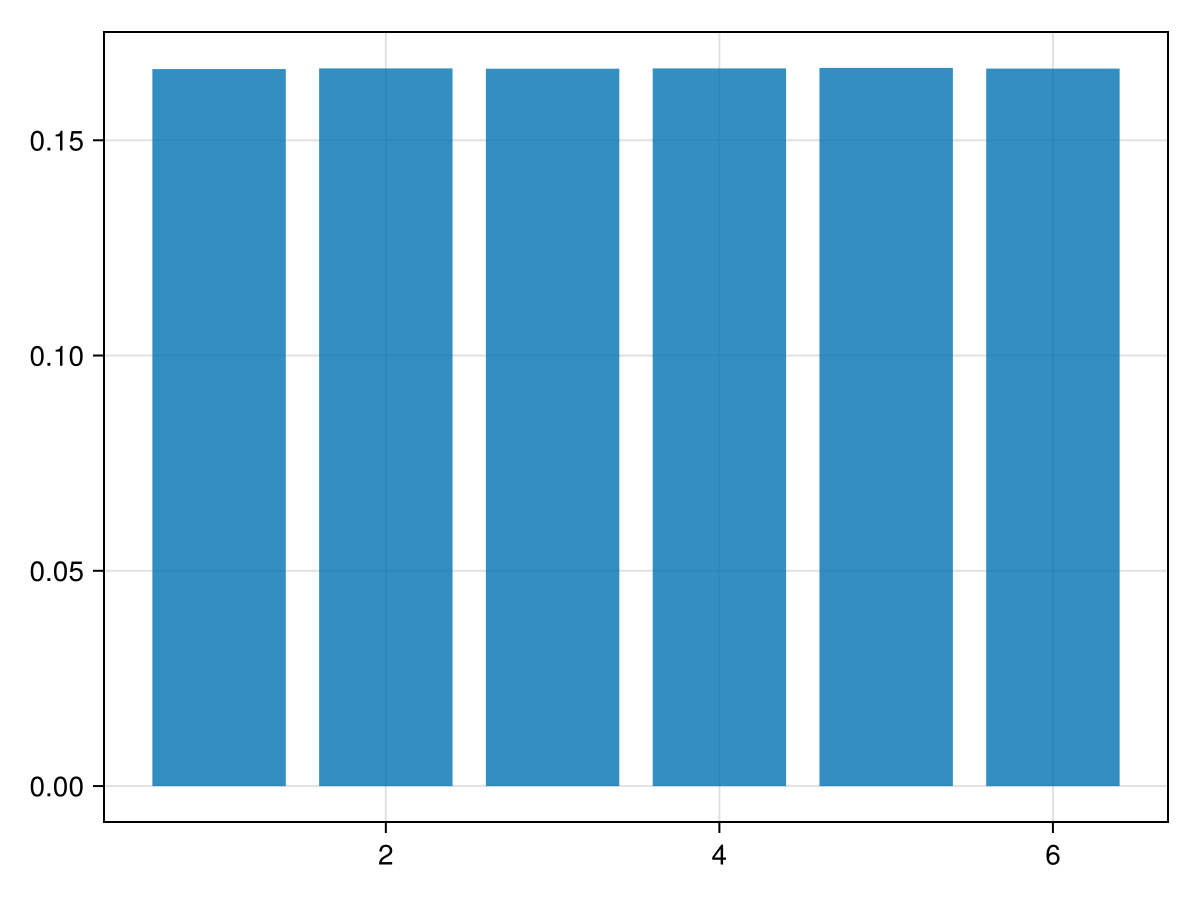

In [192]:
barplot(counts(control)/10_000_000)

In [193]:
analyze_results(control)


Results Summary:
Number of games: 10000000
Average score: 3.5004853
Minimum score: 1
Maximum score: 6
Standard Deviation: 1.7076598186097005


In [194]:
dc = rolltrials(implode, 10_000_000)

MethodError: MethodError: no method matching implode()

Closest candidates are:
  implode(!Matched::Int64; target)
   @ Main.DiceTricks c:\Users\foolf\Desktop\School\Fall 2024\SciComp\StupidDiceTricksRepo\DiceTricks.jl:11


In [195]:
barplot(counts(dc)/10_000_000)

UndefVarError: UndefVarError: `dc` not defined

In [196]:
analyze_results(dc)

UndefVarError: UndefVarError: `dc` not defined

### Yahtzee

In [197]:
function playYahtzee(trials::Integer)
    local results = Vector[]
    for i = 1:trials
        push!(results, rollPool())
    end
    return results
end

playYahzee (generic function with 2 methods)

In [198]:
scores = Int[]
scoretypes = String[]
t = playYahtzee(1_000_000)
s = scorePool.(t)
for i = 1:1_000_000
    push!(scores, s[i][1])
    push!(scoretypes, s[i][2])
end

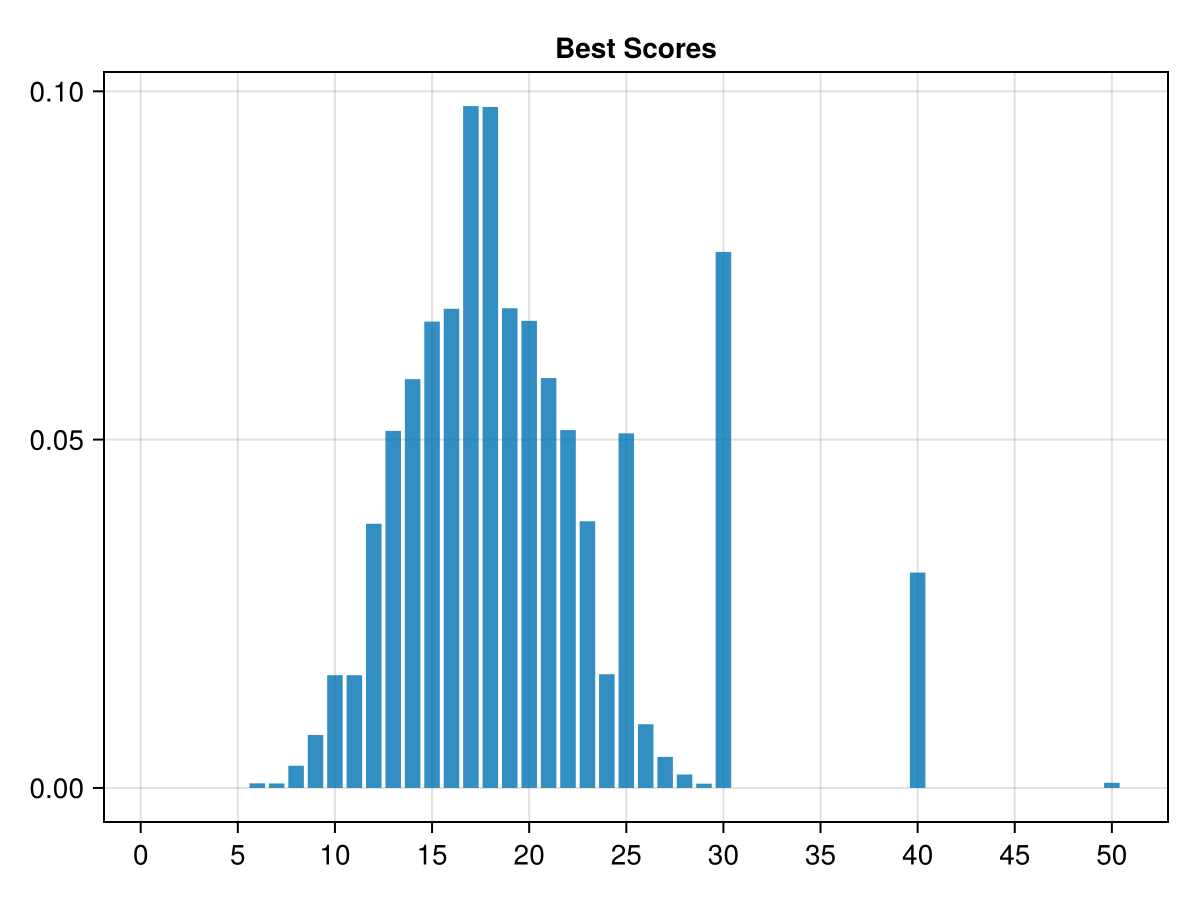

In [199]:
barplot(counts(scores, 50)./1_000_000,
        axis = (xticks = 0:5:50, title = "Best Scores")
    )

In [200]:
analyze_results(scores)


Results Summary:
Number of games: 1000000
Average score: 19.484161
Minimum score: 6
Maximum score: 50
Standard Deviation: 6.24743052434096


In [201]:
d = countmap(scoretypes)

Dict{String, Int64} with 7 entries:
  "Yahtzee"         => 738
  "Chance"          => 679254
  "High Straight"   => 30917
  "Low Straight"    => 76945
  "Four Of A Kind"  => 19013
  "Three Of A Kind" => 158535
  "Full House"      => 34598

In [202]:
scoretypes = ["Three Of A Kind", "Four Of A Kind", "Full House", "Low Straight", "High Straight", "Yahtzee", "Chance"]
scorecounts = Int[]
for i in scoretypes
    push!(scorecounts, get!(d, i, 0))
end
scorepers = scorecounts./1_000_000

7-element Vector{Float64}:
 0.158535
 0.019013
 0.034598
 0.076945
 0.030917
 0.000738
 0.679254

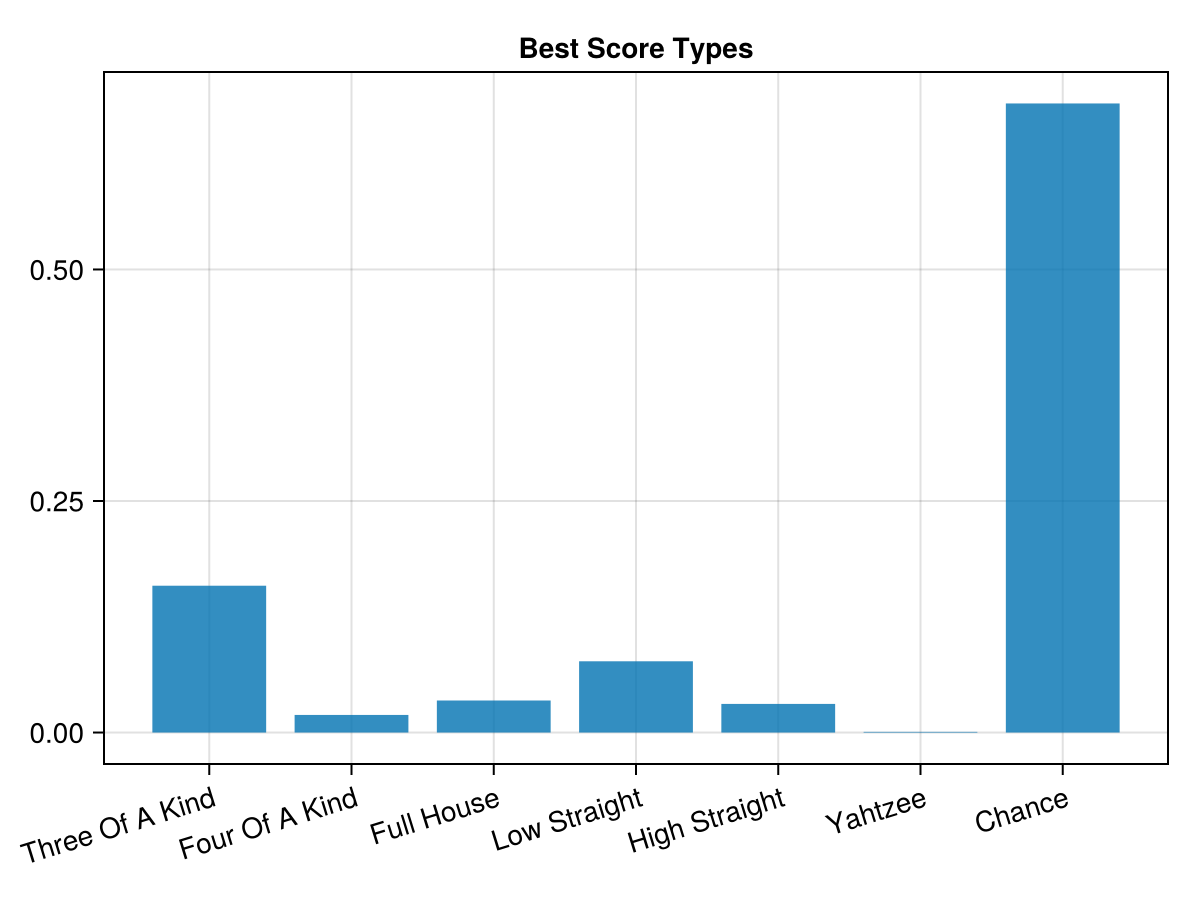

In [203]:
barplot(scorepers,
    axis = (xticks = (1:7, scoretypes),
            xticklabelrotation = 0.3,
            title = "Best Score Types")
)

In [204]:
straight1 = scorePool.(rerollForStraight.(rerollForStraight.(t)))
scores = Int[]
types = String[]
for i = 1:length(straight1)
    push!(scores, straight1[i][1])
    push!(types, straight1[i][2])
end

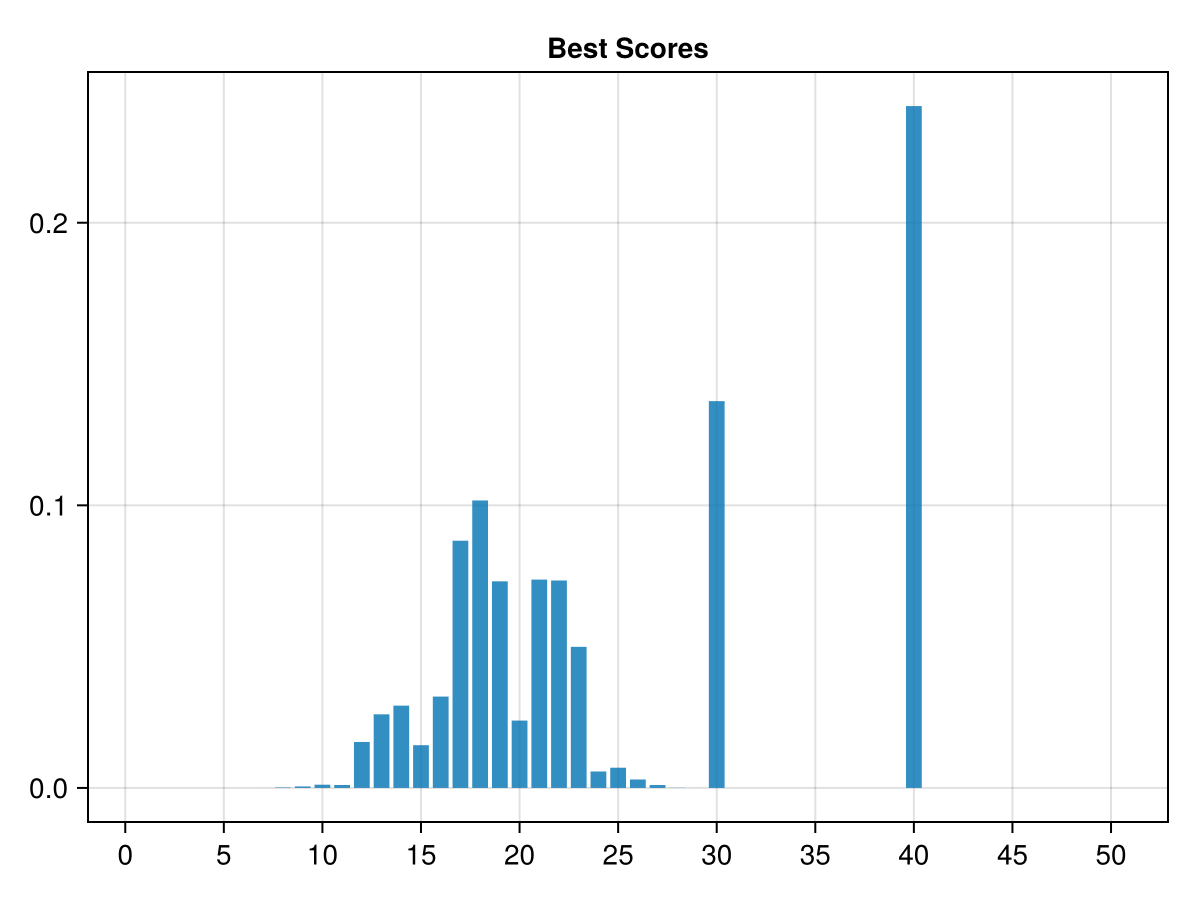

In [205]:
barplot(counts(scores, 50)./1_000_000,
        axis = (xticks = 0:5:50, title = "Best Scores")
    )

In [206]:
analyze_results(scores)


Results Summary:
Number of games: 1000000
Average score: 25.389551
Minimum score: 7
Maximum score: 40
Standard Deviation: 9.391812563320363


In [207]:
d = countmap(types)

Dict{String, Int64} with 6 entries:
  "Chance"          => 597890
  "High Straight"   => 241264
  "Low Straight"    => 136865
  "Four Of A Kind"  => 104
  "Three Of A Kind" => 23621
  "Full House"      => 256

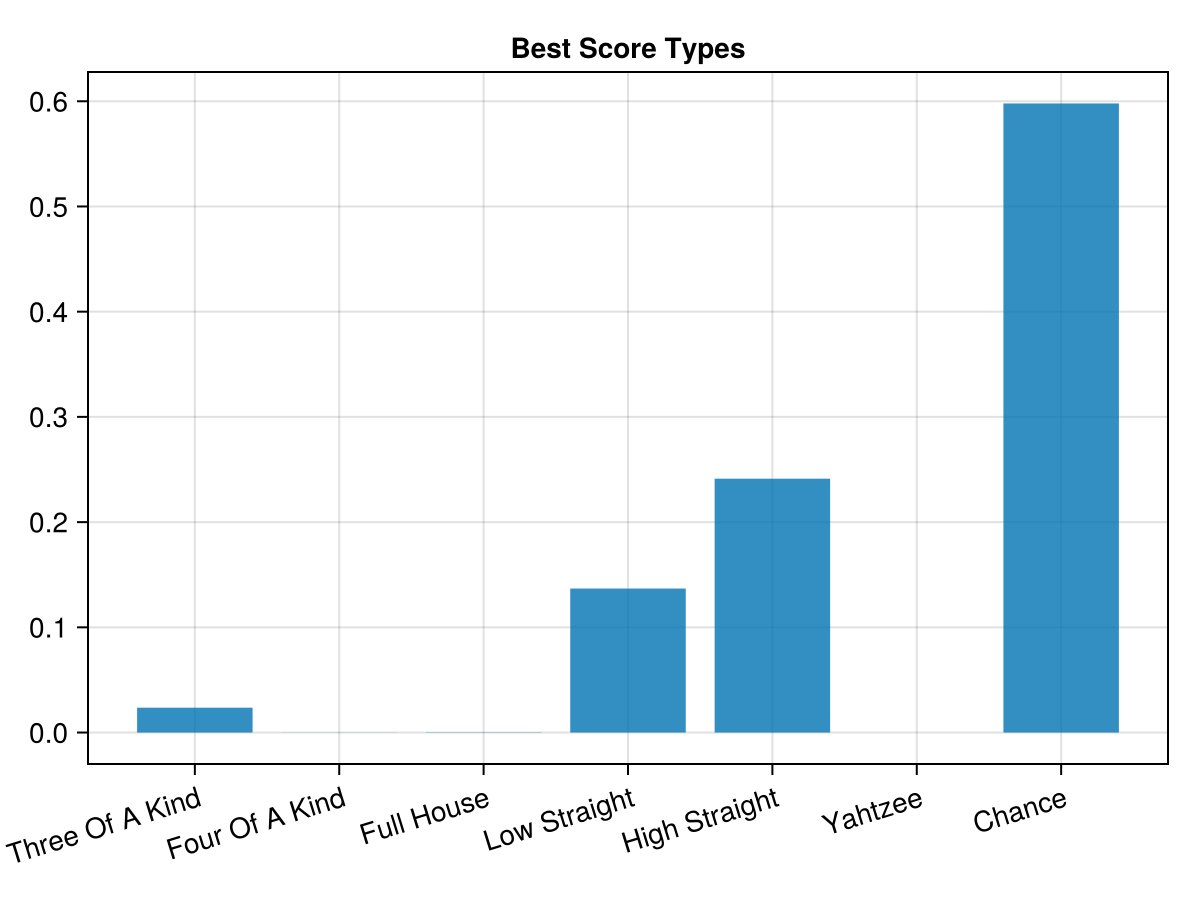

In [208]:
scoretypes = ["Three Of A Kind", "Four Of A Kind", "Full House", "Low Straight", "High Straight", "Yahtzee", "Chance"]
scorecounts = Int[]
for i in scoretypes
    push!(scorecounts, get!(d, i, 0))
end
scorepers = scorecounts./1_000_000
barplot(scorepers,
    axis = (xticks = (1:7, scoretypes),
            xticklabelrotation = 0.3,
            title = "Best Score Types")
)